# Machine Learning Beginner Challenge

In this notebook, we learn how to apply machine learning while working on the "Titanic Challenge". More specifically, we use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The Titanic Challenge is a widely used common machine learning beginner challenge. It is also the getting started competition at [Kaggle](https://www.kaggle.com) - the online community of data scientists and machine learners. So, after working through this notebook, you can quickly work on your own, improved solution, join the Kaggle competition, and compare your results with the community - give it a try!

We are going to use the python library `scikit-learn`. Scikit-learn is built on NumPy, SciPy, and matplotlib and provides a range of supervised and unsupervised learning algorithms for classification, regression, and clustering. For more information about scikit-learn, click [here](https://scikit-learn.org/stable/). 

In [54]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Data

The file `titanic_data.csv` contains data from Titanic passengers with the following columns:

- PassengerId: unique identification number for each passenger
- Survived: 0 = No, 1 = Yes
- Pclass: the passenger class, 1 = 1st (upperclass), 2 = 2nd (middle class), 3 = 3rd (lower class)
- Name: full name of the passenger
- Sex: male or female
- Age: age of passenger in years, e.g. 22
- SibSp: number of siblings/ spouses aboard the Titanic
- Parch: number of parents/ children aboard the Titanic
- Ticket: ticket number
- Fare: passenger fare  
- Cabin: cabin number
- Embarked: port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

Let's import the data and have a closer look at it:

In [55]:
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


It is always essential to have a closer look at the data first. Here are some of the questions you may want to look at more precisely. 
- Are the features numeric or categorical?
- Which features may influence the prediction, and which not?
- Which features have to be proceeded? 
- Do we have missing entries? (NaN)
    
It is also a good idea to plot some of the features to generate a good understanding of the data and decide for further processing.

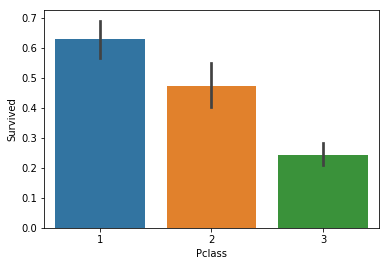

In [57]:
# Plot Class - Survived
sns.barplot(x='Pclass', y='Survived', data=titanic_data)

In the graph above we can see that class influences the chance of survival.

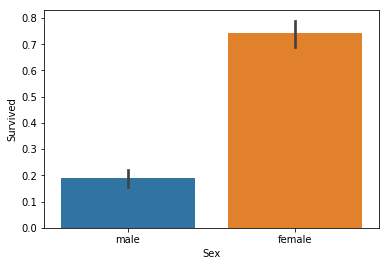

In [58]:
# Plot Sex - Survived
sns.barplot(x='Sex', y='Survived', data=titanic_data)

Also, gender impacts the chance of survival.

So the column `Survived` is our prediction target. For our first try, let's focus on the features `Pclass`, `Sex`, `Age`, and `Embarked`. 

In [101]:
print(len(titanic_data[titanic_data['Survived'] == 1]))
print(len(titanic_data[titanic_data['Survived'] == 0]))

342
549


## Data Preprocessing

First, we have to drop the features we don't want to take into consideration for the prediction.

In [59]:
data = titanic_data.drop(['PassengerId'], axis=1).drop(['Name'], axis=1).drop(['SibSp'], axis=1).drop(['Parch'], axis=1).drop(['Ticket'], axis=1).drop(['Cabin'], axis=1).drop(['Fare'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


Now we want to find out about missing entries in the remaining data:

In [60]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Age,177,19.9
Embarked,2,0.2
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


As you can see, Age is missing 177 entries, and Embarked is missing 2 entries. We are going to fill the 2 missing entries of Embarked with the most common one and the 177 entires of Age with the average age.

In [61]:
# To find out the most common entry:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [62]:
# Fill missing values of Embarked with the most common entry
common_value = 'S'
data['Embarked'] = data['Embarked'].fillna(common_value)

In [63]:
# Fill missing values of Age with the mean Age
mean = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean)

As we saw above in data.info(), we have different datatypes. We need to transform the categorical values of Sex and Embarked into numerical ones so that machine learning algorithms can process them. Furthermore, the features have different ranges that we need to convert into roughly the same scale. In our case, we need to categorize the feature Age.

In [64]:
#Sex
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [65]:
#Embarked
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

Now we categorize Age and convert it from float to int. For the categorization, it is crucial to distribute the values, and not have 90 % of the data in one group.

In [66]:
# Age
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[ data['Age'] > 66, 'Age'] = 7

In [67]:
# Let's check the distribution
data['Age'].value_counts()

4    303
6    141
3    106
5    103
2     92
1     71
0     68
7      7
Name: Age, dtype: int64

Finally, we have a last look at our data before getting started with ML:

In [68]:
data.head(10)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,2,0
1,1,1,1,5,1
2,1,3,1,3,0
3,1,1,1,5,0
4,0,3,0,5,0
5,0,3,0,4,2
6,0,1,0,6,0
7,0,3,0,0,0
8,1,3,1,3,0
9,1,2,1,1,1


## Split into Train and Test

Now we want to split the data into train and test data. There are many ways and methods to split the data. We will simply use a test size of 10 % of the data. Feel free to try other split methods!

In [83]:
# We have to separate the target column first:
X = data.drop("Survived", axis=1)
y = data["Survived"]

# And split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## ML models

Below we are going to apply different machine learning models and see which one works best.

### Logistic Regression

In [84]:
# we call the function logistic regression from scikit-learn,
logreg = LogisticRegression()
# train the model with fit,
logreg.fit(X_train, y_train)
# and make the predictions for the test data with predict.
y_pred_logreg = logreg.predict(X_test)
# the results look like this:
y_pred_logreg

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

Now, how can we evaluate the results? Of course, we need to compare our predictions to the actual correct values in y_test.

A confusion matrix is a table that is often used to describe the performance of a classification model. It is also the basis to compute further rates such as precision, recall, and f1-score. The confusion matrix consists of True Positives, True Negatives, False Positives, and False Negatives.

In [86]:
#Confusion Matrix: 

tp = 0
fp = 0
fn = 0
tn = 0

#the true values:
y_real = np.array(y_test)

for i in range(len(y_pred_logreg)):
    
    if y_pred_logreg[i] == 1 and  y_real[i] == 1:
        tp += 1
    if y_pred_logreg[i] == 0 and  y_real[i] == 0:
        tn += 1
    if y_pred_logreg[i] == 1 and  y_real[i] == 0:
        fp += 1
    if y_pred_logreg[i] == 0 and  y_real[i] == 1:
        fn += 1
        
print("tp:", tp)
print("fp:", fp)
print("fn:", fn)
print("tn:", tn)

tp: 23
fp: 13
fn: 16
tn: 38


* tp = True Positives shows how many passengers correctly classified as survived.
* tn = True Negatives shows how many passengers correctly classified as dead.
* fn = False Negatives shows how many passengers wrongly classified as dead.
* fp = False Positives shows how many passengers wrongly classified as survived.

In [87]:
# Calculate precision, recall, and f1
precision = tp / (tp + fp)
recall = tp/ (tp + fn)
f1 = (2 * precision * recall) / (precision + recall)

print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

precision: 0.6388888888888888
recall: 0.5897435897435898
f1: 0.6133333333333332


The higher precision, recall, and f1 are (the closer to 1), the better are our predictions.

Also, we can simply use the functions provided in scikit-learn to calculate precision, recall, and f1:

In [88]:
# or use sklearn:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('precision:', precision_score(y_test, y_pred_logreg))
print('recall:', recall_score(y_test, y_pred_logreg))
print('f1:', f1_score(y_test, y_pred_logreg))

precision: 0.638888888889
recall: 0.589743589744
f1: 0.613333333333


Another accuracy measurement is the function `score`, which returns the mean accuracy on the given test data and labels.

In [89]:
score_logreg = logreg.score(X_test, y_test)
print('score', score_logreg)

score 0.677777777778


### K Nearest Neighbor (KNN)

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
y_pred_knn = knn.predict(X_test)  

score_knn = knn.score(X_test, y_test)
print('score', score_knn)

print('precision:', precision_score(y_test, y_pred_knn))
print('recall:', recall_score(y_test, y_pred_knn))
print('f1:', f1_score(y_test, y_pred_knn))

score 0.688888888889
precision: 0.612244897959
recall: 0.769230769231
f1: 0.681818181818


### Stochastic Gradient Descent (SGD)

In [91]:
sgd = SGDClassifier(loss='modified_huber', max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

score_sgd = sgd.score(X_test, y_test)
print('score', score_sgd)

print('precision:', precision_score(y_test, y_pred_sgd))
print('recall:', recall_score(y_test, y_pred_sgd))
print('f1:', f1_score(y_test, y_pred_sgd))

score 0.566666666667
precision: 0.5
recall: 0.948717948718
f1: 0.654867256637


### Random Forest

In [92]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

score_rf = random_forest.score(X_test, y_test)
print('score', score_rf)

print('precision:', precision_score(y_test, y_pred_rf))
print('recall:', recall_score(y_test, y_pred_rf))
print('f1:', f1_score(y_test, y_pred_rf))

score 0.777777777778
precision: 0.74358974359
recall: 0.74358974359
f1: 0.74358974359


### Decision Tree

In [93]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred_dt = decision_tree.predict(X_test)  

score_dt= decision_tree.score(X_test, y_test)
print('score', score_dt)

print('precision:', precision_score(y_test, y_pred_dt))
print('recall:', recall_score(y_test, y_pred_dt))
print('f1:', f1_score(y_test, y_pred_dt))

score 0.755555555556
precision: 0.72972972973
recall: 0.692307692308
f1: 0.710526315789


### Support Vector Machine

In [94]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

score_svc = svc.score(X_test, y_test)
print('score', score_svc)

print('precision:', precision_score(y_test, y_pred_svc))
print('recall:', recall_score(y_test, y_pred_svc))
print('f1:', f1_score(y_test, y_pred_svc))

score 0.788888888889
precision: 0.777777777778
recall: 0.717948717949
f1: 0.746666666667


### Perceptron

In [95]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred_p = perceptron.predict(X_test)

score_p = perceptron.score(X_test, y_test)
print('score', score_p)

print('precision:', precision_score(y_test, y_pred_p))
print('recall:', recall_score(y_test, y_pred_p))
print('f1:', f1_score(y_test, y_pred_p))

score 0.433333333333
precision: 0.433333333333
recall: 1.0
f1: 0.604651162791


### Gaussian Naive Bayes

In [96]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gnb = gaussian.predict(X_test)

score_gnb = gaussian.score(X_test, y_test)
print('score', score_gnb)

print('precision:', precision_score(y_test, y_pred_gnb))
print('recall:', recall_score(y_test, y_pred_gnb))
print('f1:', f1_score(y_test, y_pred_gnb))

score 0.644444444444
precision: 0.594594594595
recall: 0.564102564103
f1: 0.578947368421


## ROC Curve


The ROC Curve is a useful to compare and evaluate different machine learning models. It shows how any predictive model can distinguish between the true positives and negatives. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The further the curve is from the diagonal line, the better the model is at discriminating between positives and negatives in general.

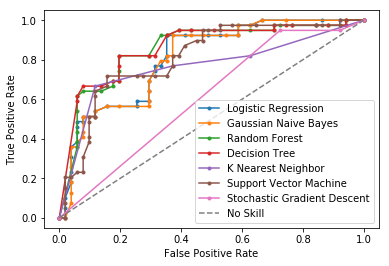

In [97]:
from sklearn.metrics import roc_curve

#Logistic Regression
pos_probs_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, pos_probs_logreg)
plt.plot(fpr_logreg, tpr_logreg, marker='.', label='Logistic Regression')

#Gaussian Naive Bayes
pos_probs_gnb = gaussian.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, pos_probs_gnb)
plt.plot(fpr_gnb, tpr_gnb, marker='.', label='Gaussian Naive Bayes')

# Random Forest
pos_probs_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, pos_probs_rf)
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest')

# Decision Tree Classifier
pos_probs_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, pos_probs_dt)
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree')

# K Nearest Neighbor
pos_probs_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, pos_probs_knn)
plt.plot(fpr_knn, tpr_knn, marker='.', label='K Nearest Neighbor')

# Support Vector Machine
pos_probs_svc = svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, pos_probs_svc)
plt.plot(fpr_svc, tpr_svc, marker='.', label='Support Vector Machine')

# Stochastic Gradient Descent 
pos_probs_sgd = sgd.predict_proba(X_test)[:, 1]
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, pos_probs_sgd)
plt.plot(fpr_sgd, tpr_sgd, marker='.', label='Stochastic Gradient Descent')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Ideas for improvement?

Now it is your turn! I am sure you already got some ideas on how to improve the estimations. If not, here are some hints:
* include more features
* create new features (e.g. combine features, extract titles from the names, ...)
* compute different categories for the features
* fill NaN values differently
* tune the hyperparameters in the algorithms
* use different models
* use k-fold cross validation